In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
first_row=['Centrales hydrauliques (GWh)','Centrales nucléaires (GWh)','Centrales thermiques (GWh)','Renouvelables (GWh)','Production brute (GWh)', 'Pompage accumulation (GWh)','Production nette (GWh)']
e_p=pd.read_excel(os.path.join('../RAW_DATA/OFS/electricity_production.xls'),skiprows=9,names=first_row,index_col=0)
e_p.reset_index(inplace=True)
e_p.rename(columns={'index':'Année'},inplace=True)
e_p

,Année,Centrales hydrauliques (GWh),Centrales nucléaires (GWh),Centrales thermiques (GWh),Renouvelables (GWh),Production brute (GWh),Pompage accumulation (GWh),Production nette (GWh)
0,1970,31273,1850,1763,0,34886,965,33921
1,1971,27563,1843,2181,0,31587,1377,30210
2,1972,25277,4650,2371,0,32298,1644,30654
3,1973,28825,5896,2434,0,37155,1724,35431
4,1974,28563,6730,2117,0,37410,1541,35869
5,1975,33974,7391,1629,0,42994,1198,41796
6,1976,26622,7561,2058,0,36241,1344,34897
7,1977,36290,7728,1885,0,45903,1277,44626
8,1978,32510,7995,1845,0,42350,1361,40989
9,1979,32345,11243,1963,0,45551,1586,43965


In [44]:
conso = pd.read_csv(os.path.join('../PRE_PROCESS_DATA/final_energy_consumption_v1'))
conso = conso[conso['Année']>=1970]
conso = conso['Électricité (TJ)']/3.6
z = np.polyfit(conso.index, conso, deg=2)
cons = np.poly1d(z)


In [45]:
data_folder='Desktop/CREM/Data'
e_p.to_csv(os.path.join("../PRE_PROCESS_DATA/energy_production_v1"))

<IPython.core.display.Javascript object>


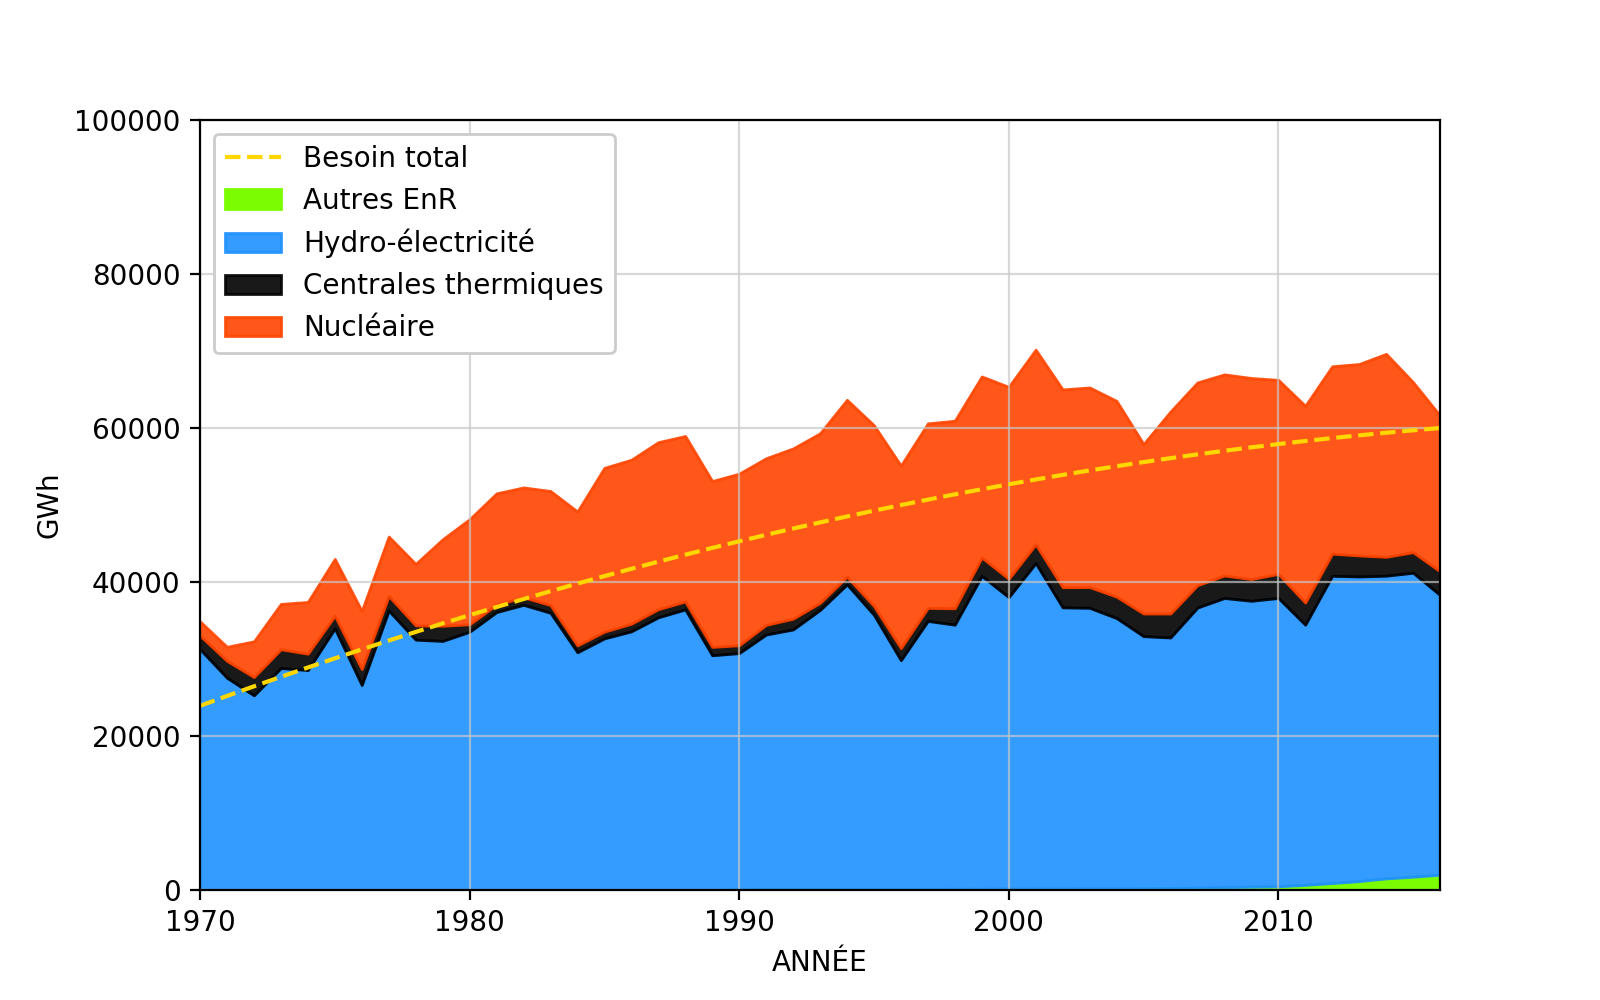

[1970, 2016, 0, 100000]

In [76]:
%matplotlib notebook

plt.figure("Production d'électricité",figsize=(8,5))
X=e_p['Année']

plt.fill_between(X,e_p['Renouvelables (GWh)'],label='Autres EnR',color='lawngreen')
plt.fill_between(X,e_p['Renouvelables (GWh)'],e_p['Renouvelables (GWh)']+e_p['Centrales hydrauliques (GWh)'],alpha= 0.9, label='Hydro-électricité',color='dodgerblue')
plt.fill_between(X,e_p['Renouvelables (GWh)']+e_p['Centrales hydrauliques (GWh)'],e_p['Renouvelables (GWh)']+e_p['Centrales hydrauliques (GWh)']+e_p['Centrales thermiques (GWh)'],label='Centrales thermiques',color='black', alpha=0.9)
plt.fill_between(X,e_p['Renouvelables (GWh)']+e_p['Centrales hydrauliques (GWh)']+e_p['Centrales thermiques (GWh)'],e_p['Renouvelables (GWh)']+e_p['Centrales hydrauliques (GWh)']+e_p['Centrales thermiques (GWh)']+e_p['Centrales nucléaires (GWh)'], label='Nucléaire',alpha= 0.9, color='orangered')
plt.plot(X, cons(range(60, 107)),'--', color='gold',label='Besoin total')

plt.grid(color='xkcd:silver', alpha= 0.7)
plt.xlabel('ANNÉE')
plt.ylabel('GWh')
plt.legend(loc=2,framealpha=1)
plt.axis([1970,2016,0,100000])